# To do:
1. Aggiungere date esami mancanti
2. Oridine: MB, (As, DDA), MQ, ML


# Organizzazione studio materie mancanti
1. **metodi probabilistici**:
<br>    riscrivere a monte e lavorare alla tesina per dopo settembre
<br>

2. **as**:
<br>
&emsp;    importante: scrivere fne esplicitamente da link notebook FIt_covid con referenza (subito dopo metodi)
<br>
&emsp;    simulazioni: vedere limite iterazioni
<br>
&emsp;    finire studiare lezioni
<br>
&emsp;    finire presentazione: semplificare + roba teoria ML, intervallo date (linee verticali) con t0,  tq, tX0, markovianità, discorso inglese, eq Gibbs, video inferenza Bayes, likelihood ed errore (provare a scrivere con numba tutto l'algoritmo)
<br>
&emsp;    quantificare: ...
3. **dda**:
<br>
&emsp;    finire report 1 e 2 (psf fare previsione)
<br>
&emsp;    sistemare fit multivariato gauss
<br>
&emsp;    presentazione su articolo
<br>
&emsp;    studio teoria

4. **ML**:
<br>    lavorare al progetto e studiare teoria
5. **MQ2**:
<br>    finire schemi capitolo 4 e parte pace

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import datetime

In [3]:
# Add exame's dates dictonary
dic = {
    'AS': ['02/02/2022', '23/02/2022'],
    'DDA': ['09/02/2022', '23/02/2022'],
    'ML': [pd.NaT, pd.NaT],
    'MB': [pd.NaT, pd.NaT],
    'MQ': ['04/02/2022', '21/02/2022'],
}

# Add cfu dictonary
cfus = {
    'MQ': 8.,
    'AS': 10.,
    'DDA': 8.,
    'ML': 9.,
    'MB': 6.
}

df = pd.DataFrame(dic).T
for ind in df.index:
    df.loc[ind, :] = pd.to_datetime(df.loc[ind, :], format='%d/%m/%Y')

df.T

,AS,DDA,ML,MB,MQ
0,2022-02-02,2022-02-09,NaT,NaT,2022-02-04
1,2022-02-23,2022-02-23,NaT,NaT,2022-02-21


In [4]:
def days_hours_minutes(td):
    string = f'{td.days}d {td.seconds//3600}h {(td.seconds//60)%60}m'
    return string


df1 = df.copy()
m = len(df1.columns)

for i in range(m):
    for j, subject in enumerate(df1.index):
        delta = df.loc[subject, i] - pd.Timestamp.today()
        df1.iloc[j, i] = days_hours_minutes(delta)

df1 = df1.replace('nand, nanh, nanm', 'nan')

df1.loc[['AS', 'MQ', 'DDA'], 1:].T

,AS,MQ,DDA
1,0d 11h 52m,-2d 11h 52m,0d 11h 52m


In [5]:
def get_seconds(time_str):
    # split in hh, mm, ss
    hh, mm, ss = time_str.split(':')
    return int(hh) * 3600 + int(mm) * 60 + int(ss)

# AS

C:\Users\manue\AppData\Local\Temp\ipykernel_14132\1916172545.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tmp = pd.read_csv("../Advanced-statistics/ppt/lezioni_AS.txt", sep=";\s",


<AxesSubplot:>

<Figure size 720x720 with 0 Axes>

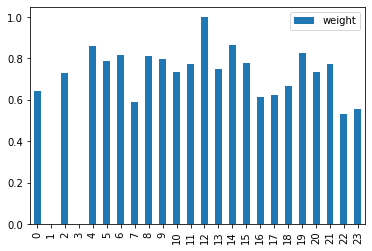

In [6]:
plt.figure(figsize=(10, 10))
tmp = pd.read_csv("../Advanced-statistics/ppt/lezioni_AS.txt", sep=";\s",
                  names=['arg', 'time', 'pag'])

tmp['weight'] = list(map(get_seconds, tmp['time'])) / tmp['pag']
tmp['weight'] /= tmp.weight.max()

tmp[['weight']].plot(kind='bar')

In [10]:
td = pd.Timedelta(0)
for t in tmp['time']:
    hh, mm, ss = t.split(':')
    td += + pd.Timedelta(hours=int(hh), minutes=int(mm), seconds=int(ss))
    

Timedelta('0 days 21:55:38')

# MQ2

In [ ]:
pags = np.concatenate((
    np.arange(3, 7),
    np.arange(8, 11),
    np.arange(12, 15),
    np.arange(18, 36),
    np.arange(39, 54),
    np.arange(60, 87),
    np.arange(39, 54),
    np.arange(161, 226)
    ))

pags

array([  3,   4,   5,   6,   8,   9,  10,  12,  13,  14,  18,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225])

In [ ]:
def pages_interval(pags: np.ndarray, pag_done: int, t_rem: int) -> None:
    n = len(pags)
    pag_day = int(round((n - pag_done) / t_rem))
    print(f'{n - pag_done} pags remaing, to do in {t_rem} days')
    print(f'{pag_day} pages/day \n')
    i = 1
    while pag_day*i<=n:
        h = pag_done
        k = pag_done + pag_day*i
        print(pags[h:k][-1])
        i += 1

In [ ]:
pages_interval()

In [ ]:
t_rem = int(df1.loc['MQ', 1:].T.to_list()[0].split('d')[0])

pages_interval(pags, 21, t_rem)

129 pags remaing, to do in 6 days
22 pages/day 

53
81
162
184
206
225


In [ ]:
ind = np.where(pags == 86)[0][0]
len(pags[ind+1:])

80

In [24]:
a = date(2022, 2, 23)
b = date(2022, 3, 21)
ndays = (b - a).days

65 / 12



5.416666666666667

In [ ]:
# 26 per ripetere e  finire schemi pace (io)
# # 80 pag da fare: 15 (cap 2) in un giorno, 65 rimanenti (cap 4) in 12 giorni (5.5 pag/giorno)
# ripetere prima volta 125 pag in 13 giorni (9.5 pag/giorno)


# DDA
* ## Report 2
    * ### Results (Psf previsione)
    * ### Conclusion
    * ### Introduction
    * ### Abstract
* ## Report 1:
    * ### Methods
    * ### Results
        * #### Codice (fit multivariato, eventuale fit con 13 psf)
    * ### Conclusion
    * ### Introduction
    * ### Abstract
# MQ
* ### studiare
    * #### 22/02-23/02 cap 2 (15 pag)
    * #### 24/02-7/03 cap 4 (65 pag) in 12 giorni (5.5 pag/giorno)
* ### ripetere 
    * #### ripetere prima volta 125 pag in 13 giorni (10 pag/giorno)
    * #### ripetere seconda volta 150 pag in 14 (11 pag/giorno) con maggiore attenzione agli argomenti delle domande